In [65]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Figures inline and set visualization
%matplotlib inline
sns.set()

# EDA - Data Limbah pada setiap KK (Kepala Keluarga) di daerah Jawa Barat

### Penjelasan pada kolom data ###

1. **kode_provinsi**: menyatakan kode Provinsi Jawa Barat sesuai ketentuan BPS merujuk pada aturan Peraturan Badan Pusat Statistik Nomor 3 Tahun 2019 dengan tipe data numerik. *

2. **nama_provinsi**: menyatakan lingkup data berasal dari wilayah Provinsi Jawa Barat sesuai ketentuan BPS merujuk pada aturan Peraturan Badan Pusat Statistik Nomor 3 Tahun 2019 dengan tipe data teks. 

3. **kode_kabupaten_kota**: menyatakan kode dari setiap kabupaten dan kota di Provinsi Jawa Barat sesuai ketentuan BPS merujuk pada aturan Peraturan Badan Pusat Statistik Nomor 3 Tahun 2019 dengan tipe data numerik. 

4. **nama_kabupaten_kota**: menyatakan lingkup data berasal dari setiap kabupaten dan kota di Provinsi Jawa Barat sesuai penamaan BPS merujuk pada aturan Peraturan Badan Pusat Statistik Nomor 3 Tahun 2019 dengan tipe data teks. 

5. **cakupan_layanan**: menyatakan kategori cakupan layanan air limbah dengan tipe data teks. sanitasi layak: fasilitas sanitasi yang memenuhi syarat kesehatan. 

    ## Cakupan layanan termasuk : 
    - **layanan dasar**: layanan dan kriteria pelayanan dengan kualitas sesuai dengan kriteria rumah layak huni. 

    - **buang air besar sembarangan**: suatu tindakan membuang kotoran atau tinja di ladang, hutan, semak-semak, sungai, pantai atau area terbuka lainnya dan dibiarkan menyebar mengontaminasi lingkungan, tanah, udara dan air. 


8. **Jumlah_Kepala_Keluarga**: menyatakan jumlah kepala keluarga dengan tipe data numerik. 

9. **satuan**: menyatakan satuan dari pengukuran jumlah cakupan air limbah dalam Kepala Keluarga dengan tipe data teks. 

10. **tahun**: menyatakan tahun produksi data dengan tipe data teks.

In [66]:
# Adding data
data = pd.read_csv('disperkim-od_19178_jml_kepala_keluarga_degan_cakupan_air_limbah__cakupan_.csv')
# Melihat 5 baris pertama pada dataset
data.head(5)

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,cakupan_layanan,jumlah_kepala_keluarga,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,SANITASI LAYAK,1148378,KEPALA KELUARGA,2019
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,LAYANAN DASAR,285761,KEPALA KELUARGA,2019
2,3,32,JAWA BARAT,3201,KABUPATEN BOGOR,BUANG AIR BESAR SEMBARANGAN,597729,KEPALA KELUARGA,2019
3,4,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,SANITASI LAYAK,511817,KEPALA KELUARGA,2019
4,5,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,LAYANAN DASAR,65584,KEPALA KELUARGA,2019


### Menampilkan jumlah setiap daerah

<Axes: >

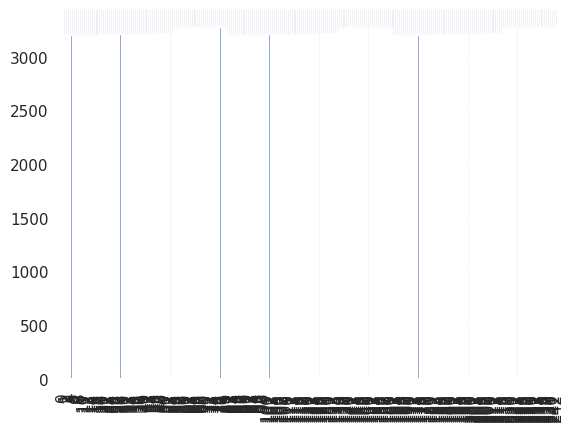

In [67]:
plt.figure()
data.kode_kabupaten_kota.plot(kind="bar")

In [68]:
"""
    Take all of values inside each columns. Why? because we will make a dataset based on the city not the entire province, to ensure a strong model

"""

data.nama_kabupaten_kota.unique()

array(['KABUPATEN BOGOR', 'KABUPATEN SUKABUMI', 'KABUPATEN CIANJUR',
       'KABUPATEN BANDUNG', 'KABUPATEN GARUT', 'KABUPATEN TASIKMALAYA',
       'KABUPATEN CIAMIS', 'KABUPATEN KUNINGAN', 'KABUPATEN CIREBON',
       'KABUPATEN MAJALENGKA', 'KABUPATEN SUMEDANG',
       'KABUPATEN INDRAMAYU', 'KABUPATEN SUBANG', 'KABUPATEN PURWAKARTA',
       'KABUPATEN KARAWANG', 'KABUPATEN BEKASI',
       'KABUPATEN BANDUNG BARAT', 'KABUPATEN PANGANDARAN', 'KOTA BOGOR',
       'KOTA SUKABUMI', 'KOTA BANDUNG', 'KOTA CIREBON', 'KOTA BEKASI',
       'KOTA DEPOK', 'KOTA CIMAHI', 'KOTA TASIKMALAYA', 'KOTA BANJAR'],
      dtype=object)

In [69]:
data.cakupan_layanan.unique()

array(['SANITASI LAYAK', 'LAYANAN DASAR', 'BUANG AIR BESAR SEMBARANGAN'],
      dtype=object)

In [70]:
data.satuan.unique()

array(['KEPALA KELUARGA'], dtype=object)

In [71]:
"""
    Mengubah bentuk teks
"""
def text_to_good_txt(nama_kolom, delete_text=None):
    # Mengubah semua teks menjadi huruf kecil
    data[nama_kolom] = data[nama_kolom].str.lower()
    
    if delete_text is not None:
        data[nama_kolom] = data[nama_kolom].str.replace(delete_text, "")
    else:
        print("Done, there's no text to delete")

In [72]:
text_to_good_txt("satuan",)
text_to_good_txt("nama_kabupaten_kota", "kabupaten ")
text_to_good_txt("cakupan_layanan",)
text_to_good_txt("nama_kabupaten_kota", "kota ")

Done, there's no text to delete
Done, there's no text to delete


In [73]:
data.head()

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,cakupan_layanan,jumlah_kepala_keluarga,satuan,tahun
0,1,32,JAWA BARAT,3201,bogor,sanitasi layak,1148378,kepala keluarga,2019
1,2,32,JAWA BARAT,3201,bogor,layanan dasar,285761,kepala keluarga,2019
2,3,32,JAWA BARAT,3201,bogor,buang air besar sembarangan,597729,kepala keluarga,2019
3,4,32,JAWA BARAT,3202,sukabumi,sanitasi layak,511817,kepala keluarga,2019
4,5,32,JAWA BARAT,3202,sukabumi,layanan dasar,65584,kepala keluarga,2019


In [74]:
"""
    Melakukan penghapusan kolom
"""
def delete_column(nama_kolom):
    for i in range(len(nama_kolom)):
        data.drop(nama_kolom[i], axis=1, inplace=True)
        print("Done")

In [75]:
data.columns

Index(['id', 'kode_provinsi', 'nama_provinsi', 'kode_kabupaten_kota',
       'nama_kabupaten_kota', 'cakupan_layanan', 'jumlah_kepala_keluarga',
       'satuan', 'tahun'],
      dtype='object')

In [76]:
kolom = [
    'id',
    'kode_provinsi',
    'nama_provinsi',
    'kode_kabupaten_kota',
    'tahun'
]

delete_column(kolom)

Done
Done
Done
Done
Done


In [77]:
data.head()

,nama_kabupaten_kota,cakupan_layanan,jumlah_kepala_keluarga,satuan
0,bogor,sanitasi layak,1148378,kepala keluarga
1,bogor,layanan dasar,285761,kepala keluarga
2,bogor,buang air besar sembarangan,597729,kepala keluarga
3,sukabumi,sanitasi layak,511817,kepala keluarga
4,sukabumi,layanan dasar,65584,kepala keluarga


In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   nama_kabupaten_kota     243 non-null    object
 1   cakupan_layanan         243 non-null    object
 2   jumlah_kepala_keluarga  243 non-null    int64 
 3   satuan                  243 non-null    object
dtypes: int64(1), object(3)
memory usage: 7.7+ KB


In [81]:
data.jumlah_kepala_keluarga.unique()

array([1148378,  285761,  597729,  511817,   65584,  136460,  492377,
         69365,  143650,  683878,   45527,  201639,  329720,  122085,
        227922,  372409,   57184,  121597,  215508,   69824,  111227,
        296632,      80,   36713,  551748,   19571,   88197,  214333,
         28005,  139993,  295990,   30298,   27084,  445005,   36269,
        129602,  399138,    8463,   43965,  201884,    8928,   24297,
        545055,   31079,   73164,  749206,   67264,   97997,  407720,
         26264,   22845,   91486,   23316,   29177,  160908,    2273,
         60948,   58570,    5386,   10376,  345672,   10435,  213272,
         81664,     185,    8015,  568890,    8972,    7846,  368397,
         15847,   13814,  117923,    1095,   32189,   97079,    8617,
         77358,   50563,    2612,    1362, 1015474,  488481,  527924,
        541061,   53637,  119337,  548121,   35704,  128524,  736343,
         84811,  161565,  384849,  114216,  193718,  436552,   41347,
         75514,  242

<Axes: xlabel='cakupan_layanan'>

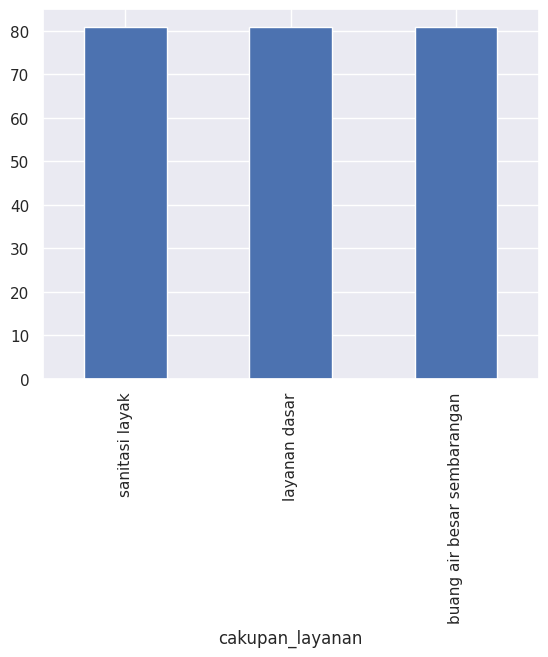

In [83]:
plt.figure()
data.cakupan_layanan.value_counts().plot(kind="bar")

<Axes: xlabel='nama_kabupaten_kota'>

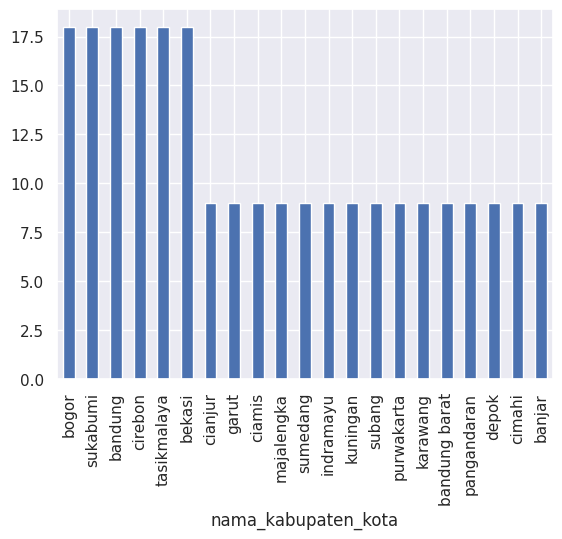

In [87]:
plt.figure()
data.nama_kabupaten_kota.value_counts().plot(kind="bar")

## PENJELASAN
 - NILAI '0' = BAB SEMBARANGAN
 - NILAI '1' = LAYANAN DASAR
 - NILAI '2' = SANITASI LAYAK

In [91]:
# Label encoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_encoder = data
data_encoder['cakupan_layanan'] = le.fit_transform(data_encoder['cakupan_layanan'])
data_encoder.head()

,nama_kabupaten_kota,cakupan_layanan,jumlah_kepala_keluarga,satuan
0,bogor,2,1148378,kepala keluarga
1,bogor,1,285761,kepala keluarga
2,bogor,0,597729,kepala keluarga
3,sukabumi,2,511817,kepala keluarga
4,sukabumi,1,65584,kepala keluarga
